In [79]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [80]:
print(sys.path)

['C:\\Users\\petru\\AI-project-methodology\\notebooks', 'C:\\ProgramData\\Anaconda3\\python39.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\Users\\petru\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', '..', '..', '..']


In [81]:
#df_master= pd.read_csv(r'/Repositories/AI-project-methodology/data/train.csv',index_col='ID')

df_master= pd.read_csv('C:/Users/petru/OneDrive/Documents/AI project methodology/archive/train.csv') #,index_col='ID')

In [82]:
df = df_master.copy()
target=df_master['y']
df=df_master.drop('y',axis=1)
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.6+ MB


# Creating Data PipeLines

In [83]:
continuous_columns = list(df.select_dtypes(include='number').columns)
categorical_columns=list(df.select_dtypes(include='object').columns)

## Continious

In [84]:
def impute_continuous_missing_values(dataframe: pd.DataFrame) -> pd.DataFrame:
    default_value = 0
    continuous_columns = dataframe.select_dtypes(include='number').columns
    [dataframe[column_name].fillna(default_value, inplace=True) for column_name in continuous_columns]
    return dataframe

def preprocess_continuous_data(dataframe: pd.DataFrame) -> pd.DataFrame:
     return impute_continuous_missing_values(dataframe)




In [85]:
preprocess_continuous_data(df)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown


## Categorical

In [86]:
def get_categorical_column_names(dataframe: pd.DataFrame) -> [str]:
    categorical_columns = list(dataframe.select_dtypes(include='object').columns)
    return categorical_columns

def impute_categorical_missing_values(dataframe: pd.DataFrame) -> pd.DataFrame:
    default_value = 'missing value mate !'
    categorical_columns = get_categorical_column_names(dataframe)
    [dataframe[column_name].fillna(default_value, inplace=True) for column_name in categorical_columns]
    return dataframe

In [87]:
df_master[categorical_columns].isna().sum()


job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

In [88]:
impute_categorical_missing_values(df)[categorical_columns].isna().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


encoder = OneHotEncoder(handle_unknown='ignore', dtype=int, sparse=True)
encoder.fit(df[categorical_columns])
encoder

OneHotEncoder(dtype=<class 'int'>, handle_unknown='ignore')

In [90]:
encoded_categorical_df = encoder.transform(df[categorical_columns])
encoded_categorical_df 

<12870x44 sparse matrix of type '<class 'numpy.int32'>'
	with 115830 stored elements in Compressed Sparse Row format>

In [91]:
#MODEL_DIR=Path(r'/Repositories/AI-project-methodology/models')
MODEL_DIR=Path('C:/Users/petru/AI-project-methodology/models')

In [92]:
import joblib

def get_one_encoder(dataframe: pd.DataFrame, encoder_dir: Path) -> OrdinalEncoder:
    one_hot_encoder_path = MODEL_DIR/'one_hot_encoder.joblib'
    if one_hot_encoder_path.exists():
        one_hot_encoder = joblib.load(one_hot_encoder_path)
    else:
        categorical_columns = get_categorical_column_names(dataframe)
        one_hot_encoder = OrdinalEncoder(handle_unknown='ignore', dtype=int, sparse=True)
        one_hot_encoder.fit(dataframe[categorical_columns])
        joblib.dump(one_hot_encoder, one_hot_encoder_path) 
    return one_hot_encoder

def encode_categorical_data(dataframe: pd.DataFrame, one_hot_encoder: OrdinalEncoder) -> pd.DataFrame:
    categorical_columns = get_categorical_column_names(dataframe)
    encoded_categorical_data_matrix = one_hot_encoder.transform(dataframe[categorical_columns])
    encoded_data_columns = one_hot_encoder.get_feature_names(categorical_columns)
    encoded_categorical_data_df = pd.DataFrame.sparse.from_spmatrix(data=encoded_categorical_data_matrix,
                                                                columns=encoded_data_columns, index=dataframe.index)
    encoded_df = dataframe.copy().drop(categorical_columns, axis=1).join(encoded_categorical_data_df)
    return encoded_df

In [93]:
encoder = get_one_encoder(df,MODEL_DIR)
encoded_df = encode_categorical_data(df, encoder)


Trying to unpickle estimator OneHotEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [94]:
# encoded_df


In [95]:
def preprocess_categorical_data(dataframe: pd.DataFrame, models_dir: Path) -> pd.DataFrame:
    dataframe = impute_categorical_missing_values(dataframe)
    encoder = get_one_encoder(dataframe, models_dir)
    encoded_df = encode_categorical_data(dataframe, encoder)
    return encoded_df

In [96]:
def preprocess(dataframe: pd.DataFrame, models_dir) -> pd.DataFrame:
    preprocessed_df = dataframe.copy()
    preprocessed_df = preprocess_continuous_data(dataframe)
    preprocessed_df = preprocess_categorical_data(preprocessed_df, models_dir)
    return preprocessed_df

In [97]:
df_encoded = preprocess_categorical_data(df, MODEL_DIR)

Trying to unpickle estimator OneHotEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [98]:
preprocessed_df = preprocess(df, MODEL_DIR)
preprocessed_df.head()

Trying to unpickle estimator OneHotEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


,ID,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,13829,29,18254,11,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,22677,26,512,5,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,10541,30,135,14,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,13689,41,30,10,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11304,27,321,2,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


## Data Engineering

no     8903
yes    3967
Name: y, dtype: int64


([<matplotlib.patches.Wedge at 0x298c508ca30>,
 [Text(-0.6233235169778338, 0.9063486046673125, 'No'),
  Text(0.623323601836312, -0.9063485463075488, 'Yes')])

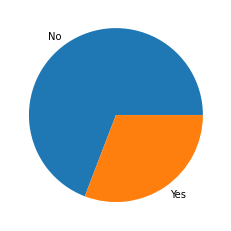

In [66]:
#checking the data class balance/distribution

print(df_master['y'].value_counts())
plt.pie(df_master['y'].value_counts(), labels=['No', 'Yes'])

In [23]:
from sklearn.preprocessing import OrdinalEncoder

df_engineering = df_master.copy()
enc = OrdinalEncoder()
df_engineering[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]] = enc.fit_transform(df_engineering[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]])


In [24]:
# X = df_master[['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
#        'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
#        'previous', 'poutcome']]
# y = pd.DataFrame(df_master['y'])

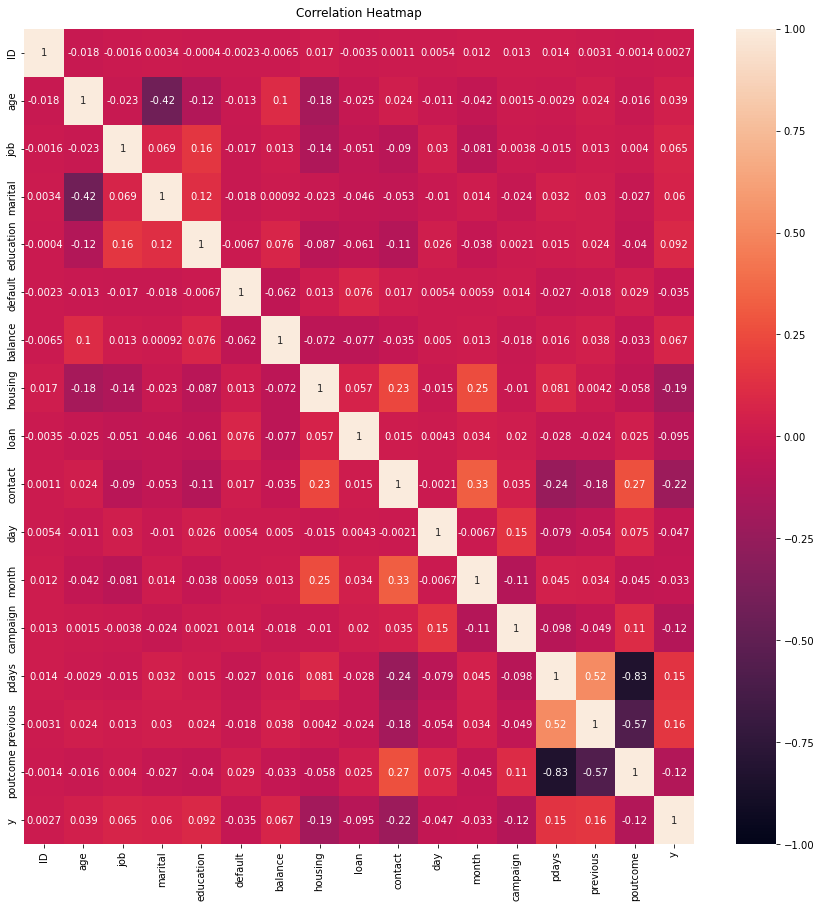

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_engineering.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [26]:
preprocessed_df = df_engineering[["education", "housing", "loan", "contact", "pdays", "previous", "poutcome"]]

In [27]:
preprocessed_df.head()

,education,housing,loan,contact,pdays,previous,poutcome
0,2.0,0.0,0.0,0.0,-1,0,3.0
1,1.0,1.0,1.0,2.0,-1,0,3.0
2,1.0,0.0,0.0,0.0,-1,0,3.0
3,3.0,1.0,0.0,0.0,-1,0,3.0
4,1.0,0.0,1.0,2.0,-1,0,3.0


# Modeling

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,scale, StandardScaler

In [115]:
x_tr,x_val,y_tr,y_val =train_test_split(df,target,test_size=0.3,rando_state=42,stratify=target)
#x_tr,x_val,y_tr,y_val =train_test_split(preprocessed_df,target,test_size=0.3,random_state=42,stratify=target)

ValueError: Found input variables with inconsistent numbers of samples: [9009, 12870]

In [113]:
rf = RandomForestClassifier()
preprocessed_df = preprocess(x_tr, MODEL_DIR)
rf.fit(preprocessed_df, y_tr)

Trying to unpickle estimator OneHotEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.


RandomForestClassifier()

In [102]:
preprocess_df_val=preprocess(x_val,MODEL_DIR)
pred = rf.predict_proba(preprocess_df_val)

Trying to unpickle estimator OneHotEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.


In [103]:
from joblib import dump
dump(rf, MODEL_DIR/'predict.joblib')

['C:\\Users\\petru\\AI-project-methodology\\models\\predict.joblib']

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pred[:,1])

0.7822547813584438

In [108]:
import shap
rf_shap_values = shap.KernelExplainer(rf.predict,x_tr)

Provided model function fails when applied to the provided data set.


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


ValueError: could not convert string to float: 'admin.'

In [77]:
import shap

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(preprocessed_df[:50])

shap.force_plot(explainer.expected_value[1], shap_values[1],preprocessed_df[:50])

Trying to unpickle estimator OneHotEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


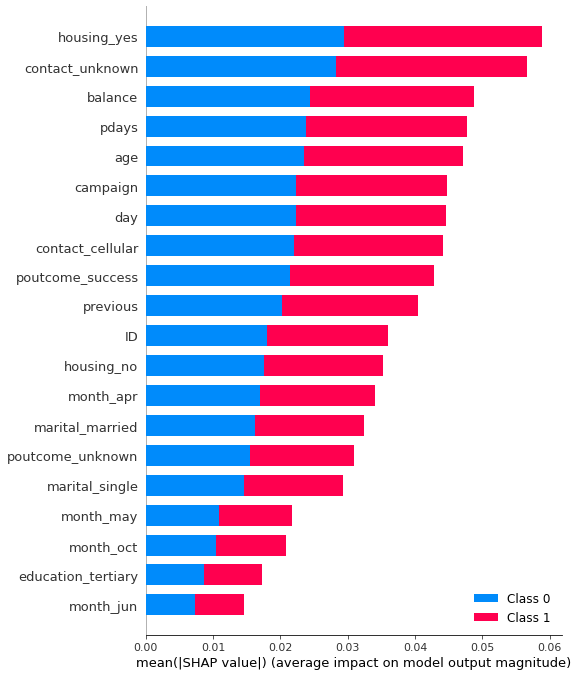

In [118]:
shap.summary_plot(shap_values, preprocess(x_val,MODEL_DIR))


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Trying to unpickle estimator OneHotEncoder from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

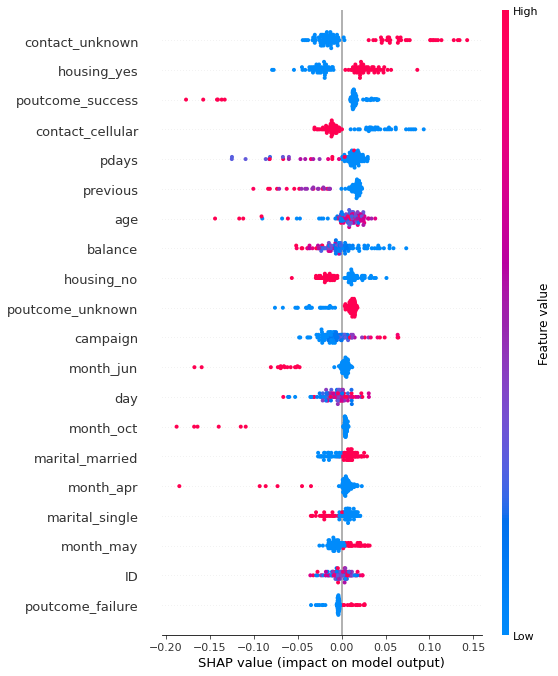

In [121]:
shap_values = explainer.shap_values(preprocess(x_val[0:100], MODEL_DIR), check_additivity=False)

shap.summary_plot(shap_values[0], preprocess(x_val[0:100], MODEL_DIR))